<a href="https://colab.research.google.com/github/ananthu34/Assg_9-Association_rules/blob/main/Assossiation_rule2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

movies = pd.read_csv('movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
movies=movies.drop(['genres'], axis = 1).join(movies.genres.str.get_dummies('|'))
movies.head(5)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
frequent_itemsets = apriori(movies.drop(['title','movieId'],axis = 1), min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.169315,(Action)
1,0.122411,(Adventure)
2,0.063890,(Children)
3,0.363288,(Comedy)
4,0.120548,(Crime)
5,0.054247,(Documentary)
6,0.478356,(Drama)
7,0.071671,(Fantasy)
8,0.096110,(Horror)
9,0.059507,(Mystery)


In [13]:
rules=association_rules(frequent_itemsets, metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111
1,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475
2,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,0.030822,1.243510
3,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654
4,(Comedy),(Romance),0.363288,0.169315,0.090082,0.247964,1.464511,0.028572,1.104581
5,(Romance),(Comedy),0.169315,0.363288,0.090082,0.532039,1.464511,0.028572,1.360609
6,(Drama),(Crime),0.478356,0.120548,0.067616,0.141352,1.172576,0.009952,1.024228
7,(Crime),(Drama),0.120548,0.478356,0.067616,0.560909,1.172576,0.009952,1.188009
8,(Thriller),(Crime),0.189479,0.120548,0.057863,0.305379,2.533256,0.035022,1.266089
9,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,0.035022,1.558693


In [14]:
# 90% confidence
rules2=association_rules(frequent_itemsets,metric='lift',min_threshold=0.9)
rules2


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111
1,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475
2,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,0.030822,1.243510
3,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654
4,(Comedy),(Romance),0.363288,0.169315,0.090082,0.247964,1.464511,0.028572,1.104581
5,(Romance),(Comedy),0.169315,0.363288,0.090082,0.532039,1.464511,0.028572,1.360609
6,(Drama),(Crime),0.478356,0.120548,0.067616,0.141352,1.172576,0.009952,1.024228
7,(Crime),(Drama),0.120548,0.478356,0.067616,0.560909,1.172576,0.009952,1.188009
8,(Thriller),(Crime),0.189479,0.120548,0.057863,0.305379,2.533256,0.035022,1.266089
9,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,0.035022,1.558693


In [15]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Adventure),(Action),0.122411,0.169315,0.058301,0.476276,2.812955,0.037575,1.586111
1,(Action),(Adventure),0.169315,0.122411,0.058301,0.344337,2.812955,0.037575,1.338475
2,(Thriller),(Action),0.189479,0.169315,0.062904,0.331984,1.960746,0.030822,1.243510
3,(Action),(Thriller),0.169315,0.189479,0.062904,0.371521,1.960746,0.030822,1.289654
4,(Comedy),(Romance),0.363288,0.169315,0.090082,0.247964,1.464511,0.028572,1.104581
5,(Romance),(Comedy),0.169315,0.363288,0.090082,0.532039,1.464511,0.028572,1.360609
6,(Drama),(Crime),0.478356,0.120548,0.067616,0.141352,1.172576,0.009952,1.024228
7,(Crime),(Drama),0.120548,0.478356,0.067616,0.560909,1.172576,0.009952,1.188009
8,(Thriller),(Crime),0.189479,0.120548,0.057863,0.305379,2.533256,0.035022,1.266089
9,(Crime),(Thriller),0.120548,0.189479,0.057863,0.480000,2.533256,0.035022,1.558693


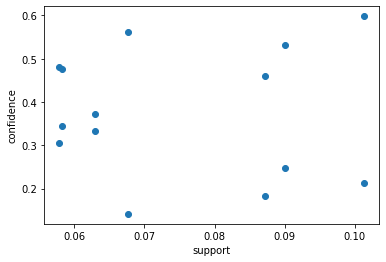

In [8]:
# visualization of obtained rule
import matplotlib.pyplot as plt
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()